<a href="https://colab.research.google.com/github/Abhinavk910/Deep-Learning/blob/master/Predicting%20Image/%20Hand%20Written%20Number%20/Mnist_handwirtten_number_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical
from sklearn.metrics import  confusion_matrix
import itertools

Using TensorFlow backend.


In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

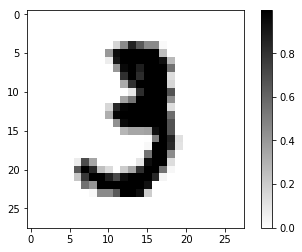

In [4]:
plt.figure()
plt.imshow(x_train[10], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

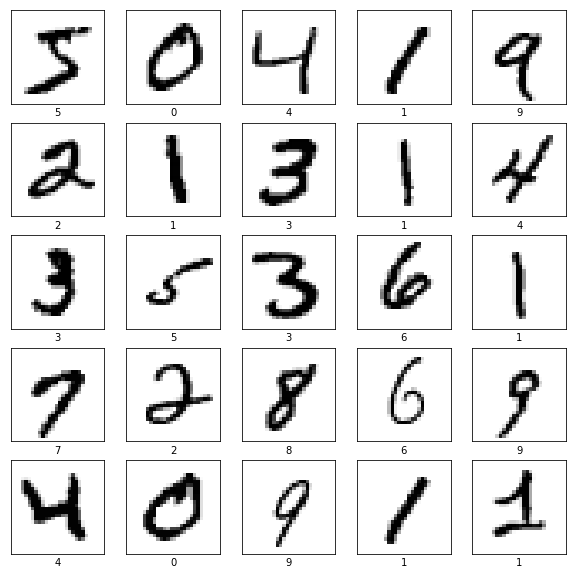

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [6]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [17]:
np.random.seed(42)
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1_history = model1.fit(x_train, y_train, epochs=20, batch_size = 32 ,validation_data = (x_test, y_test),verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2018 - acc: 0.9399 - val_loss: 0.1047 - val_acc: 0.9690
Epoch 2/20
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0799 - acc: 0.9757 - val_loss: 0.0836 - val_acc: 0.9748
Epoch 3/20
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0532 - acc: 0.9834 - val_loss: 0.0994 - val_acc: 0.9694
Epoch 4/20
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0368 - acc: 0.9882 - val_loss: 0.0636 - val_acc: 0.9819
Epoch 5/20
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0272 - acc: 0.9912 - val_loss: 0.0735 - val_acc: 0.9792
Epoch 6/20
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0214 - acc: 0.9929 - val_loss: 0.0774 - val_acc: 0.9803
Epoch 7/20
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0182 - acc: 0.9941 - val_l

**Human Level Error** :- 0 % 

**Training Error** :- 0.24 %

**Validation  Error** :- 1.8 %

In [0]:
predictions = model1.predict(x_test)

### Plots

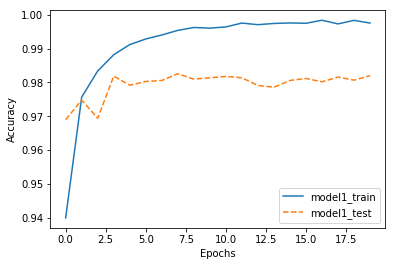

In [19]:
def accuracy_plot(model_history, key):
  plt.plot(model_history.epoch, model_history.history['acc'], label = key +'_train')
  plt.plot(model_history.epoch, model_history.history['val_acc'],'--', label = key+'_test')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend();

accuracy_plot(model1_history, 'model1')

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  plt.xlabel("Pred. {} ({:2.0f}%), Orig. {}".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label))


def plot_value_array(i, predictions_array, true_label):

  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [20]:
false = np.where(np.argmax(predictions, axis = 1) != np.argmax(y_test, axis = 1))[0]
print(f'There are {false.shape[0]} images that were wrongly predicted')

There are 180 images that were wrongly predicted


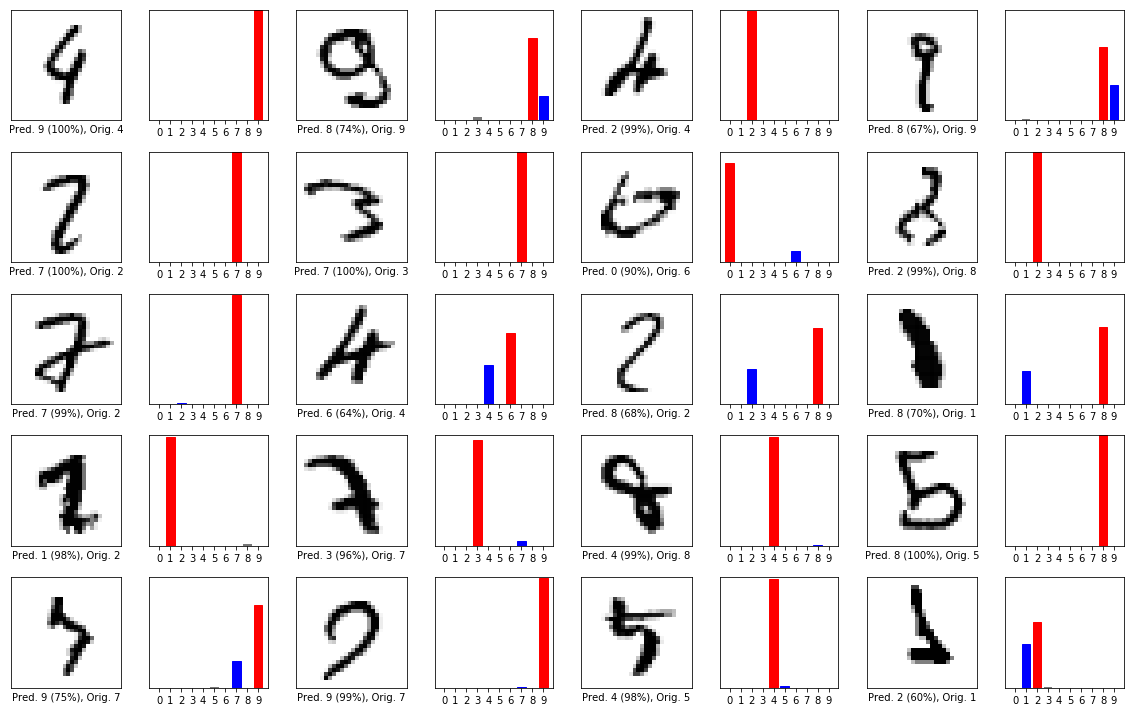

In [21]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(false[i], predictions[false[i]], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(false[i], predictions[false[i]], y_test)
plt.tight_layout()
plt.show()

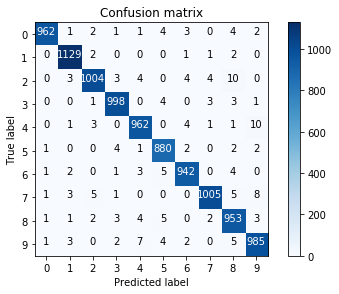

In [26]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Y_pred = model1.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

10 images are those whose true label is 4 but predicted 9. Lets check those 10.

In [28]:
check = np.where((np.argmax(predictions, axis = 1) == 9)*(np.argmax(y_test, axis = 1) == 4))[0]
check.shape[0]

10

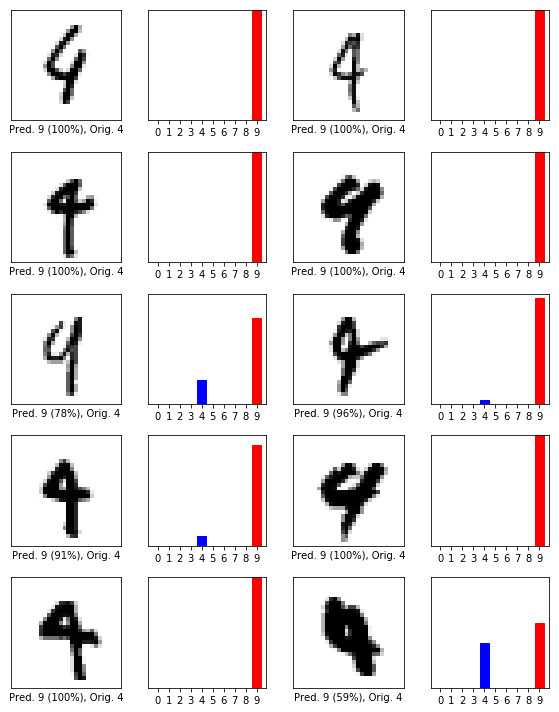

In [29]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(check[i], predictions[check[i]], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(check[i], predictions[check[i]], y_test)
plt.tight_layout()
plt.show()

There are 10 images that are originally 2 but predicted 8.

In [33]:
check = np.where((np.argmax(predictions, axis = 1) == 9)*(np.argmax(y_test, axis = 1) == 7))[0]
check.shape[0]

8

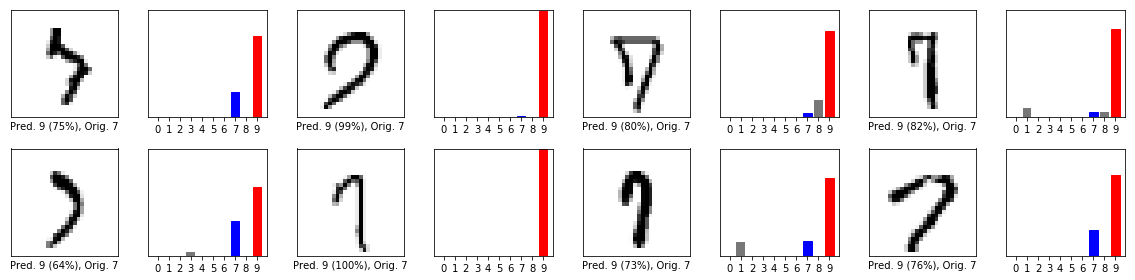

In [34]:
num_rows = 2
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(check[i], predictions[check[i]], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(check[i], predictions[check[i]], y_test)
plt.tight_layout()
plt.show()

There are 8 image that are originally 8 but predicted 3.

Model unable to preform well on test set comparable to training set. Mean there is overfitting. So, we have to tackle overfitting by :

1. Adding Regularization
2. Adding Dropout
3. Adding data 
4. Batch Normalization